# 1 Time Series

## References:
1. Robert Shumway and David Stoffer (2017). [Time Series Analysis and Its Applications: with R Examples](https://www.stat.pitt.edu/stoffer/tsa4/tsa4.htm), Springer, 4th edition.
2. Christopher Wikle, Andrew Zammit-Mangion and Noel Cressie (2019). Spatio-temporal Statistics with R, CRC Press.
3. Peter Brockwell and Richard Davis (2016). Introduction to Time Series and Forecasting, Springer, 4th edition.
4. Noel Cressie and Christopher Wikle (2011). Statistics for Spatio-temporal Data, Wiley.

In [6]:
#install.packages('astsa')
library(astsa)

## Example 1: Earnings of Enterprise Johnson & Johnson
* Trend: $f(t)\approx be^{at}$ -> Regression.
* Regular Variation: Drop at every four quarters -> Structural Equation.

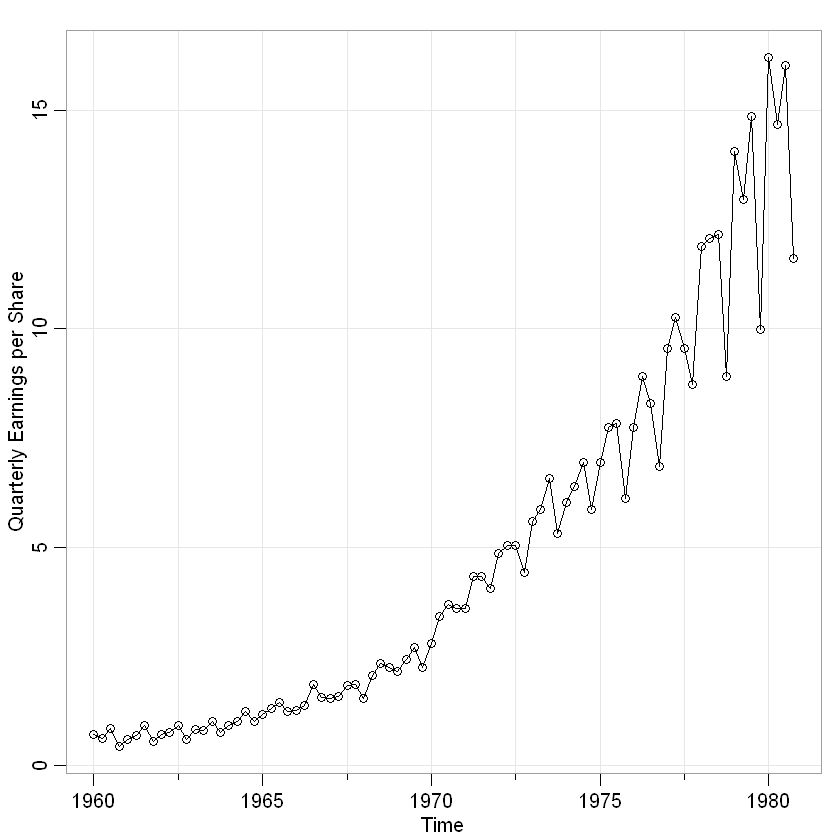

In [9]:
tsplot(jj, type="o", ylab="Quarterly Earnings per Share")
dev.off()

## Example 2: Global Warming

* Trend: Stable before 1940, rising after 1940.
* Change point: Increasing pattern.

Insignificant after computation.

null device 
          1

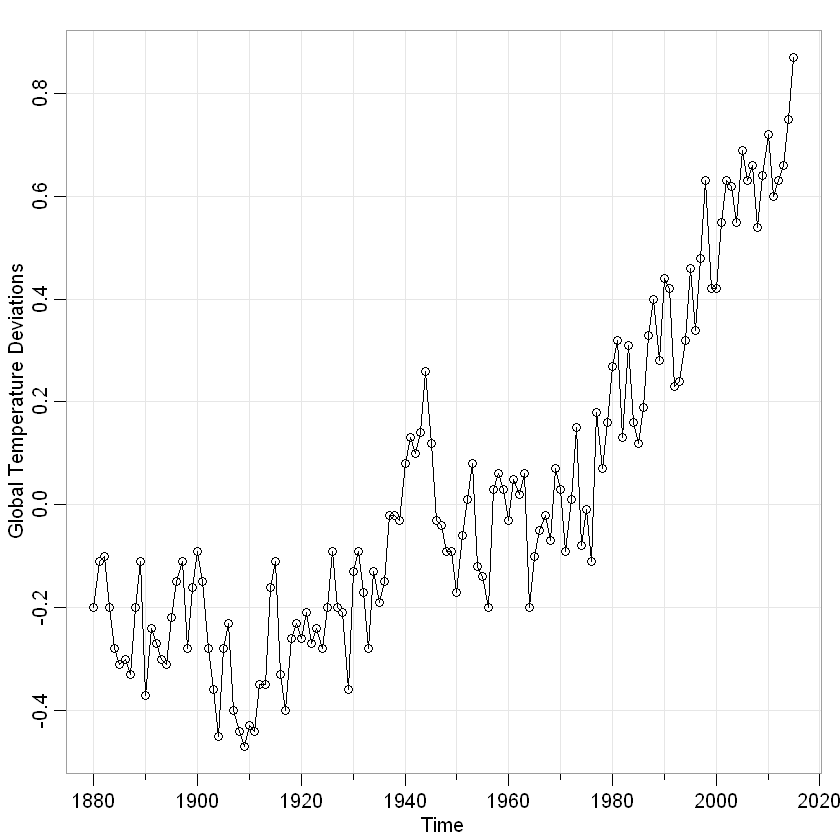

In [6]:
tsplot(globtemp, type="o", ylab="Global Temperature Deviations")
dev.off()

## Example 3: Speech

Spectral analysis: repetitive pattern (time domain -> frequency domain)

null device 
          1

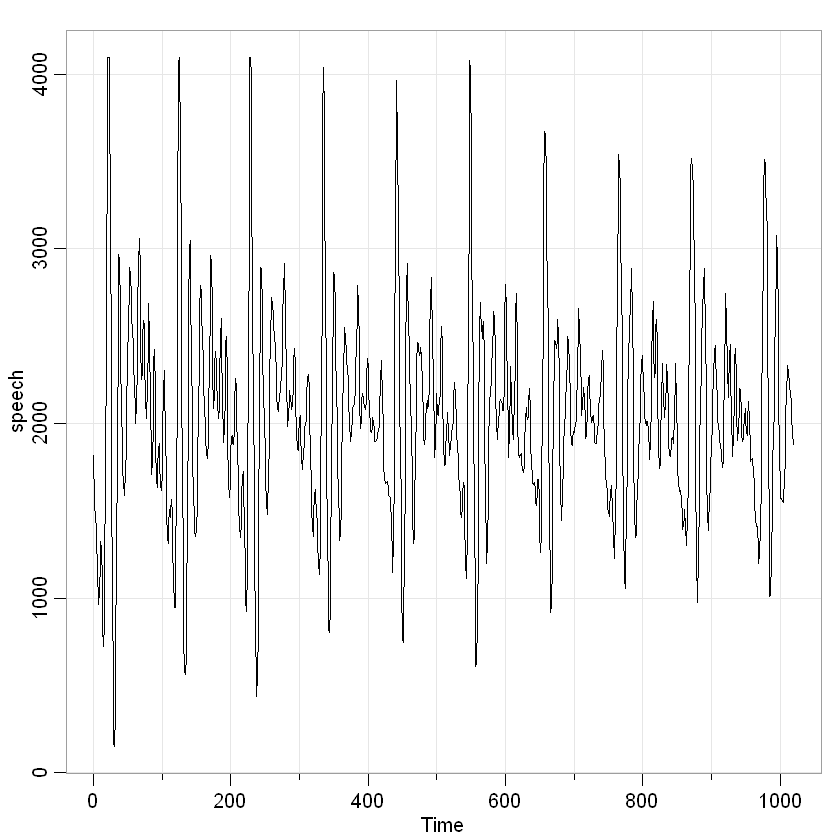

In [7]:
tsplot(speech)  
dev.off()

## Example 4: Dow Jones Industrial Average Returns (DJIAR)

Return: $$R_t=\frac{P_t-P_{t-1}}{P_{t-1}}$$

* Trend: Stable. 
* Variation: Large volatility around 2008.

(GARCH Model)

null device 
          1

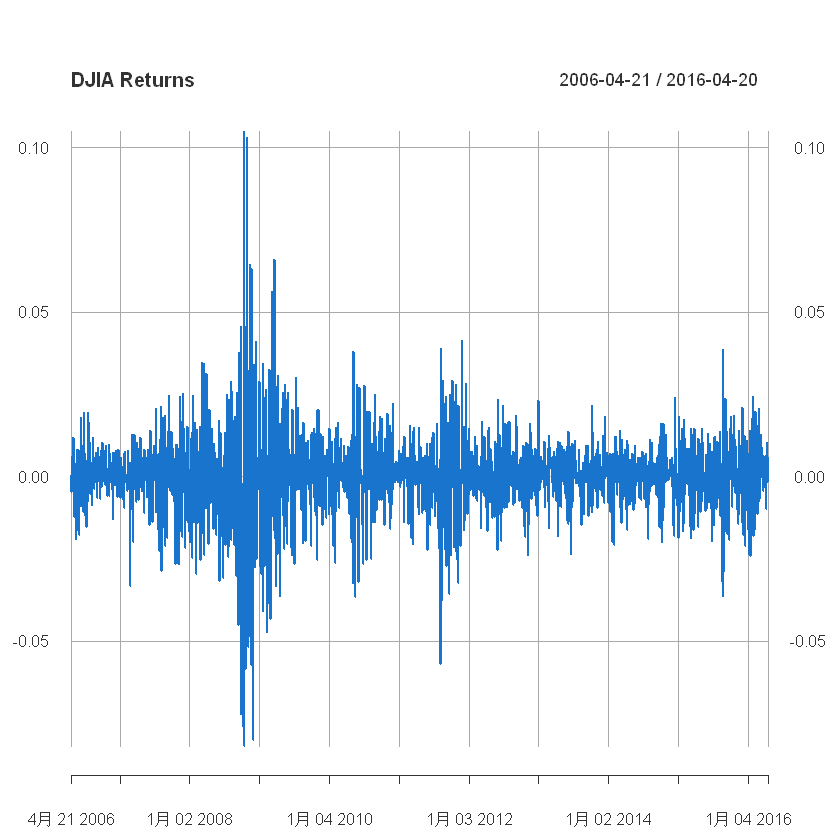

In [7]:
library(xts)
djiar = diff(log(djia$Close))[-1]        
plot(djiar, col=4, main="DJIA Returns") 
dev.off()

## Example 5: SOI and fishing
Multiple time series

* Periodic: SOI at a faster rate while fishing shows lagged dependence

null device 
          1

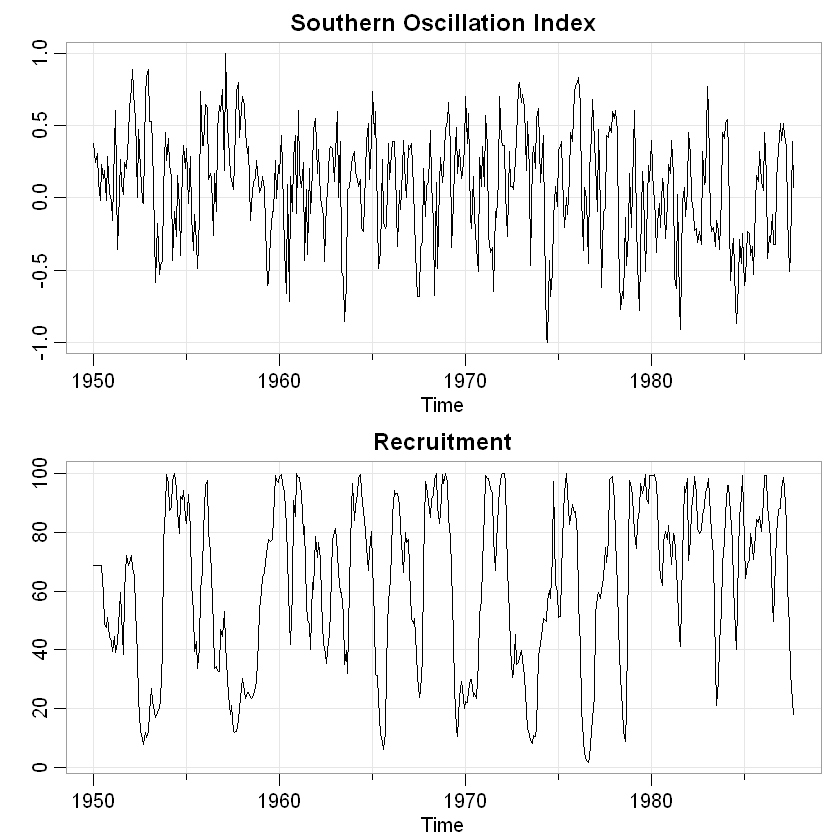

In [9]:
par(mfrow = c(2,1))  # set up the graphics
tsplot(soi, ylab="", main="Southern Oscillation Index")
tsplot(rec, ylab="", main="Recruitment") 
dev.off()

## Example 6: FMRI 

ANOVA (Analysis of Variance)

null device 
          1

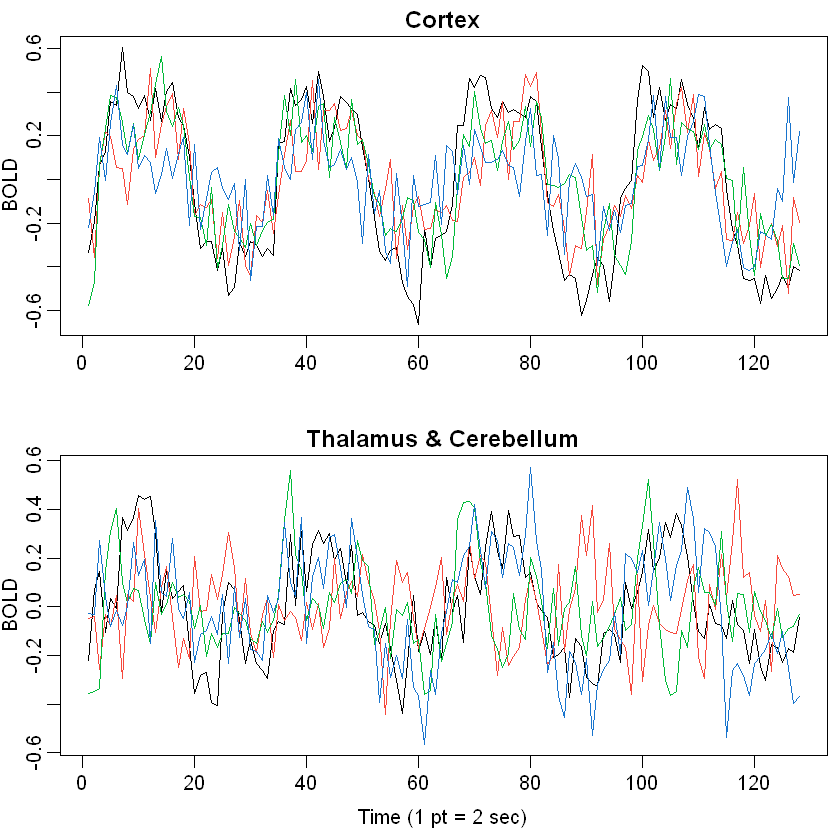

In [10]:
par(mfrow=c(2,1), mar=c(3,2,1,0)+.5, mgp=c(1.6,.6,0))  
ts.plot(fmri1[,2:5], col=1:4, ylab="BOLD", xlab="", main="Cortex")
ts.plot(fmri1[,6:9], col=1:4, ylab="BOLD", xlab="", main="Thalamus & Cerebellum")
mtext("Time (1 pt = 2 sec)", side=1, line=2) 
dev.off()

## Example 7: Earthquake and Explosion

Spectral Analysis. Discriminator Analysis.

null device 
          1

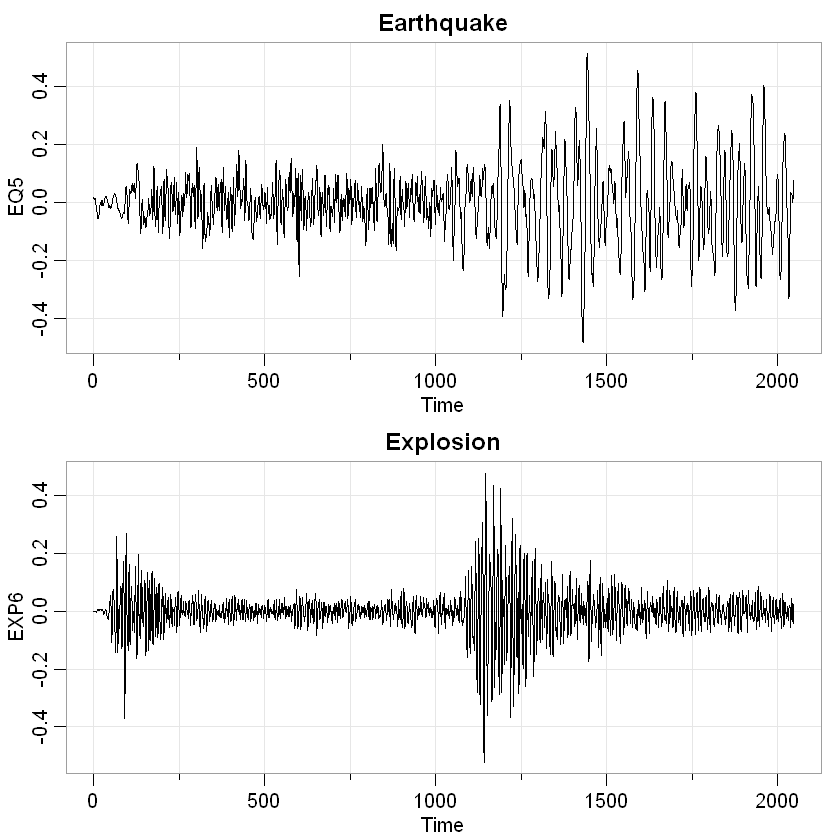

In [12]:
par(mfrow=c(2,1))
tsplot(EQ5, main="Earthquake")
tsplot(EXP6, main="Explosion")
dev.off()

# Time Series Statistical Models

* Definition. $\{x_t,\ t=0,\pm 1,\pm 2,\dotsc\}$

  1. A collection of random variables following the order when they are observed.
  2. Stochastic process indexed by continuous / discrete time.

## White Noise

* Definition. $w_t\sim (0,\sigma^2)$ (not necessarily normal) and uncorrelated.

Futher, independent white noise: $w_t\sim_{i.i.d.} (0,\sigma^2)$

Futhermore, Gaussian white noise: $w_t\sim_{i.i.d.} N(0,\sigma^2)$

## Moving Average
Average of some 'continuous' observations in a moving window. e.g. 
$$\quad v_t = \frac13\left(w_{t-1}+w_t+w_{t+1}\right)$$

It is implemented by filter function in R.

## Auto-regression

Current state determined by previous states and some noise. 
 e.g. $$\quad x_t = x_{t-1} - 0.9x_{t-2}+ w_t$$
The noise is also called innovation sometimes.

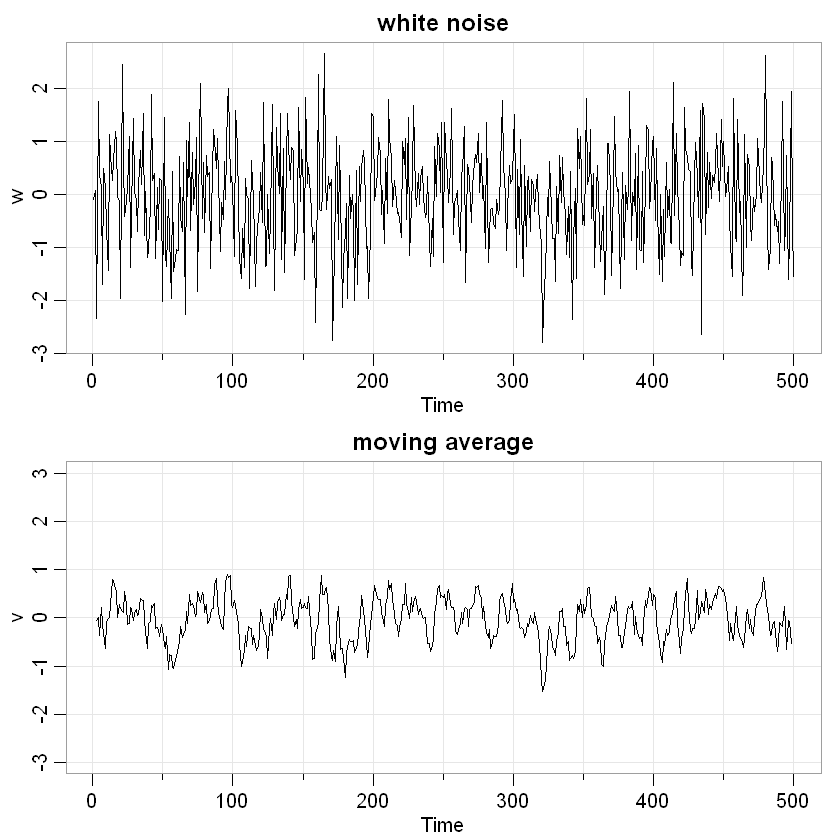

png 
  2

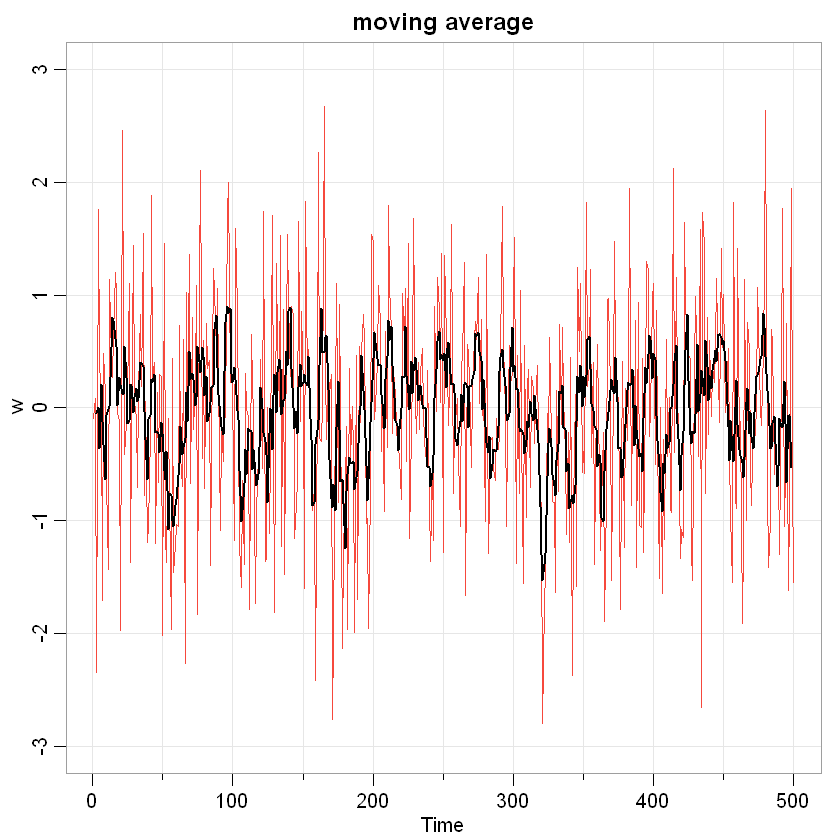

In [16]:
n <- 5
w = rnorm(500,0,1)  # 500 N(0,1) variates
v = filter(w, sides=2, rep(1/n,n))  # moving average
par(mfrow=c(2,1))
tsplot(w, main="white noise")
tsplot(v, ylim=c(-3,3), main="moving average")
# overlapping view
par(mfrow=c(1,1))
tsplot(w, col=2, ylim=c(-3,3), main="moving average")
lines(v,lwd=2)

# now try this (not in text):  
dev.new()  # open a new graphic device
ts.plot(w, v, lty=2:1, col=1:2, lwd=1:2)
dev.off()

null device 
          1

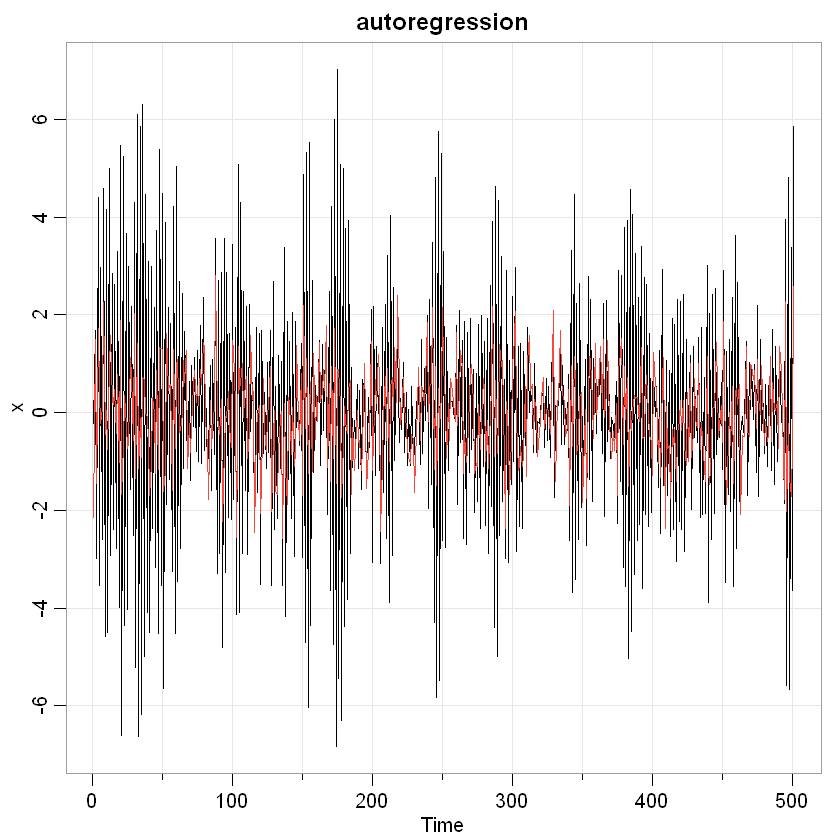

In [25]:
w = rnorm(550,0,1)  # 50 extra to avoid startup problems
x = filter(w, filter=c(-.9), method="recursive")[50:550]
tsplot(x, main="autoregression")
lines(w[50:550], col=2)
dev.off()

## Random Walk with Drift

Current state induced by the previous state, some constant action and some innovation. e.g. for some constant $\delta$
$$x_t = \delta + x_{t-1} + w_t\\
\Rightarrow x_t = \delta t + \sum_{j=1}^t w_j$$

null device 
          1

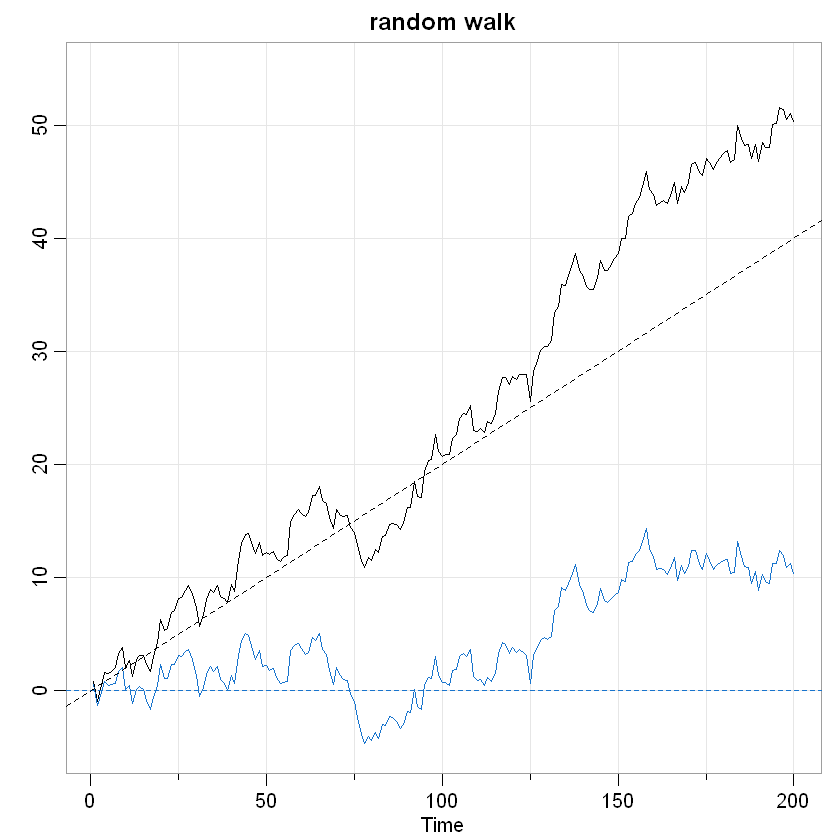

In [26]:
set.seed(154) # so you can reproduce the results
w = rnorm(200); x = cumsum(w) # two commands in one line
wd = w +.2;    xd = cumsum(wd)
tsplot(xd, ylim=c(-5,55), main="random walk", ylab='')
lines(x, col=4) 
abline(h=0, col=4, lty=2)
abline(a=0, b=.2, lty=2)
dev.off()

## Signal in Noise

Noised signal function $x_t = Acos(\omega t+ \phi) + w_t$

e.g.  
$$ x_t = 2\cos (2\pi \frac{t+15}{50}) + w_t$$

null device 
          1

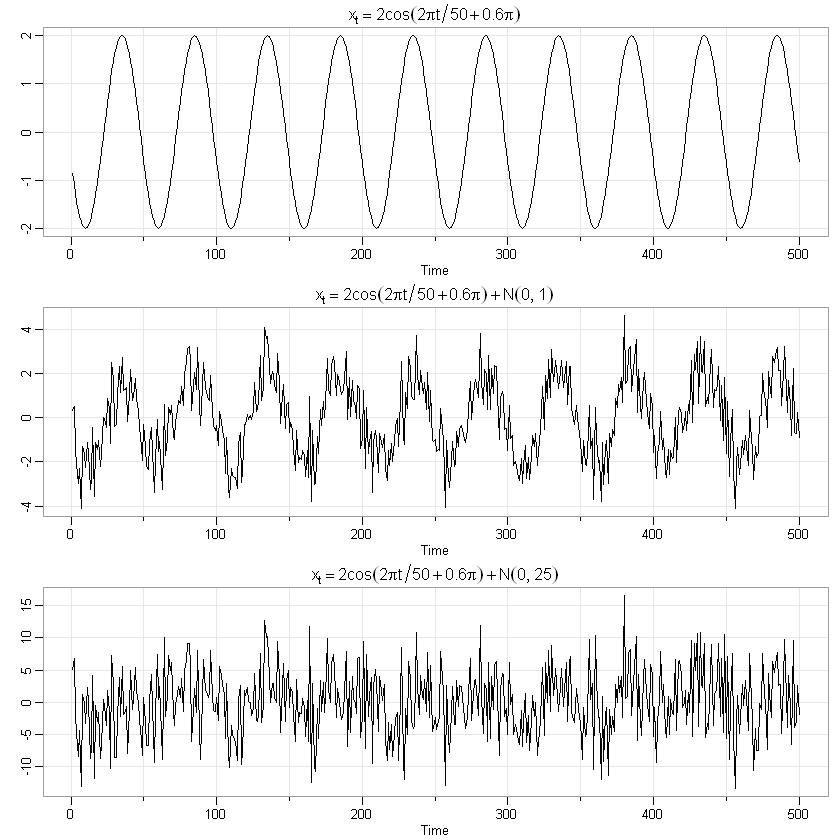

In [37]:
cs = 2*cos(2*pi*((1:500)+15)/50.)
w = rnorm(500,0,1.)
par(mfrow=c(3,1), mar=c(3,2,2,1), cex.main=1.5)
tsplot(cs, ylab="", main = expression(x[t]==2*cos(2*pi*t/50+.6*pi)))
tsplot(cs + w, ylab="", main = expression(x[t]==2*cos(2*pi*t/50+.6*pi)+N(0,1)))
tsplot(cs + 5*w, ylab="", main = expression(x[t]==2*cos(2*pi*t/50+.6*pi)+N(0,25)))
dev.off()

# Basics in Statistics

## Joint distribution 

Define the cummulative distribution function by 
$$ F(c_1,\dotsc,c_n) = \mathbb P(x_{t_1}\leqslant c_1,\ \dotsc,\ x_{t_n}\leqslant c_n)$$

* Complete information
* Limited usefulness -- because there is no serial structure or any easy visualization.

## Marginal distribution

$$ F_t(x) = \mathbb P(x_t\leqslant x)$$

It has density (when existed) $$f_t(x) = \frac{\partial }{\partial x}\mathbb P(x_t\leqslant x)$$

## Mean function

It is the expectance of the variable at time $t$.
$$\mu_{x_t} = \mu_t = \mathbb E(x_t) = \int_{-\infty}^{+\infty}xf_t(x)dx$$

White noise and its moving average has mean $\mu = 0$.

Random walk with drift has average $\mu_t = \delta t$.



## Autocovariance function

It is the covariance of variable at two moment $s$, $t$.

$$\gamma_x(s,t) = {\rm Cov}(x_s,x_t) = \mathbb E\{(x_s - \mu_s)(x_t - \mu_t)\}$$

Properties:

* Symmetric: $\gamma(s,t) = \gamma(t,s)$.
* Linear Dependence: $\gamma(s,t) = 0\Rightarrow x_s,x_t$ are linear independent.
* Variance: $\gamma (s,s) = {\rm Var}(x_s)$.

Examples:

#### Autocovariance of Moving Average of White Noise

Suppose $l$ is the length of moving average. Then the covariance is determined by the length of overlap.
$$\gamma_{v_l}(s,t) = \frac{\max\{0,l - |t - s|\}}{l^2}\sigma^2$$


#### Autocovariance of Random Walk with Drifts

$$\gamma_x(s,t) = {\rm Cov}(\delta s+\sum_{i=1}^s w_i,\delta t+\sum_{i=1}^t w_i)
=\mathbb E\left[\left(\sum_{i=1}^s w_i\right)\left(\sum_{i=1}^t w_i\right)\right]
=\min\{s,t\}\sigma^2
$$

## Cross-covariance function

It is the covariance of two time series $\{x_s\},\{y_t\}$.

$$\gamma_{xy}(s,t) = {\rm Cov}(x_s,y_t)  = \mathbb E\{(x_s - \mu_s)(y_t - \mu_t)\}$$

## Autocorrelation function (ACF)

$$\rho (s,t) = \frac{\gamma(s,t)}{\sqrt{\gamma(s,s)\gamma(t,t)}}$$

Properties:

* Symmetric: $\rho(s,t) = \rho(t,s)$.
* Standardlized: $-1\leqslant \rho(s,t)\leqslant 1$ with equality iff perfect linear dependent: $x_t = \beta_0 + \beta_1 x_s$.

## Cross-correlation function (CCF)

$$\rho (s,t) = \frac{\gamma_{xy}(s,t)}{\sqrt{\gamma_x(s,s)\gamma_y(t,t)}}$$
